<a href="https://colab.research.google.com/github/HanlunAI/NextGenCurriculumDemonstration/blob/main/DemonstrationGamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preface
##Learn how to learn

In the beginning, computers were invented with an aim to supplement human thinking methods, more specifically, to help us think straight through the midst of complexity. In this series of demonstrations, we provide a journey of mathematical knowledge discovery accompanied with the nurturing of computer skills by the way. In practice, the Mathematics part will include some basic counting principles and statistics, and the Computer part will be some pre-written Python codes for high school students. Through this journey, you may develop you own style of exploration via self-experiment, peer learning, web-searching, etc.

Demonstration materials in this series are by no means designed to be self-contained; but rather, we present some puzzles to guide the audience through a journey of learning. The author hoped audiences would enjoy this journey filling in the remaining details to construct their own knowledge base.

-- YK Tai

*Acknowledgement*

*The author would like to thank Bobby Poon for going through this material, giving feedback and hosting a workshop.*

Remark

Codes in this series of demonstrations meant to serve as starters for audiences to try out different experiments. For some codes, audiences may use yield statement to save memory like what [itertools](https://docs.python.org/3/library/itertools.html#itertools.combinations) did. Further usage of binary operations may also boost the performance.

#3. Combination


##3.1 Counting Combinations

**3.1.1** Discussion

Given $n$ fixed choices, one would like to make $r$ choices without repetition in a row for $0\leq r \leq n$.
One may disregard the ordering and call these $r$ choices a combination.

Denote by $C^n_r$, or sometimes $_nC_r$, the number of combinations. By considering the number of times had been overcounted when ordering come into play. The number of combinations $C^n_r$ is related to the number of permutations $P^n_r$ by a simple relation:

$$r! C^n_r = P^n_r$$

Hence,

$$C^n_r = \frac{P^n_r}{r!} = \frac{n!}{r!(n-r)!}$$


As a consequence of the above result, we may realize that the product of any $r$ consecutive positive integers is always divisible by $r!$ because the division gives rise to the counting number of some combinations, that has to be an integer. 

Think about it, is there more we could conclude when $n$ also happens to be a prime number?

In [1]:
def combinate(n,r):
  if r>n:
    print("r should be no larger than n")
    return
  #to safely write down the next few lines, it does require some mathematical knowledge
  ways = 1
  for i in range(r):
    ways *= n-i
    ways //= i+1
  return ways

#assign non-negative integer values to variables
n = 10
r = 3
print("{}C{} = {}.".format(n,r,combinate(n,r)))

10C3 = 120.


**3.1.2** Daisy is like the previous guy Charles. We need to list the combinations for some small $n$ and $r$ to help her out.

*Hands-on lab for workshop*

In [2]:
binaryChoice = ['0','1']

for choice1 in binaryChoice:
  for choice2 in binaryChoice:
    for choice3 in binaryChoice:
      print(choice1+choice2+choice3)

000
001
010
011
100
101
110
111


*More Hands-on:*

1.   Add an if-clause to the above code to list all choices with two 1's. 
2.   Rename the choices A, B and C, could we amend the codes to output in these names?



Now, let's see some pre-written codes

In [3]:
#Let's start with a list of distinct strings
moreToken = ['A','B','C','D','E','F','G','H','I','J','K']

#Start the bookkeeping with some initializations
nCrTriangle = [[['']],[['0'],['1']]]

def expansion(n):
  if len(nCrTriangle) > n:
    return nCrTriangle[n]
  previousExpansion = expansion(n-1)
  newExpansion = [[] for i in range(n+1)]
  for nCrList in previousExpansion:
    for item in nCrList:
      expand0 = '0' + item
      expand1 = '1' + item
      itemMass = item.count('1')
      newExpansion[itemMass].append(expand0)
      newExpansion[itemMass+1].append(expand1)
  nCrTriangle.append(newExpansion)
  return newExpansion

def nCrListPrint(n,r):
  print("The following is a list of "+str(n)+"C"+str(r)+" = "+str(len(nCrTriangle[n][r]))+" distinct combinations:", end = '\n')
  count = 0
  for item in nCrTriangle[n][r]:
    selectedToken = ''.join(moreToken[i] if item[i]=='1' else '_' for i in range(len(item)))
    count += 1
    print(str(count)+".\t"+selectedToken, end = '\n')
  return

#assign small integer values (0<=r<=n<=<11) to variables
n = 8
r = 3
expansion(n)
nCrListPrint(n,r)

The following is a list of 8C3 = 56 distinct combinations:
1.	ABC_____
2.	AB_D____
3.	AB__E___
4.	AB___F__
5.	AB____G_
6.	AB_____H
7.	A_CD____
8.	A_C_E___
9.	A_C__F__
10.	A_C___G_
11.	A_C____H
12.	A__DE___
13.	A__D_F__
14.	A__D__G_
15.	A__D___H
16.	A___EF__
17.	A___E_G_
18.	A___E__H
19.	A____FG_
20.	A____F_H
21.	A_____GH
22.	_BCD____
23.	_BC_E___
24.	_BC__F__
25.	_BC___G_
26.	_BC____H
27.	_B_DE___
28.	_B_D_F__
29.	_B_D__G_
30.	_B_D___H
31.	_B__EF__
32.	_B__E_G_
33.	_B__E__H
34.	_B___FG_
35.	_B___F_H
36.	_B____GH
37.	__CDE___
38.	__CD_F__
39.	__CD__G_
40.	__CD___H
41.	__C_EF__
42.	__C_E_G_
43.	__C_E__H
44.	__C__FG_
45.	__C__F_H
46.	__C___GH
47.	___DEF__
48.	___DE_G_
49.	___DE__H
50.	___D_FG_
51.	___D_F_H
52.	___D__GH
53.	____EFG_
54.	____EF_H
55.	____E_GH
56.	_____FGH


## 3.2 Some Properties of Combinations

**3.2.1** We may insert a scratch cell to play with the above codes for a while longer.


Let's try with a few small $n$ and $r$ and see if you could find some patterns to prove the following basic properties (and specify the requirement for $n$ and $r$ when necessary):

1.   $C^n_r=C^n_{n-r}$
2.   $C^n_r=C^{n-1}_{r-1}+C^{n-1}_{r}$
3.   $C^n_r=C^{n-1}_{r-1}+C^{n-2}_{r-1}+\cdots+C^{r-1}_{r-1}$
4.   $C^{n}_{0}+(-1)C^{n}_{1}+\cdots+(-1)^{n-1}C^{n}_{n-1}+(-1)^{n}C^{n}_{n} = 0$

    (Hint for 4: one may execute nCrListPrint(4,0), nCrListPrint(4,1), nCrListPrint(4,2), nCrListPrint(4,3), nCrListPrint(4,4) at once to look for some clue)
5.   There are more for you to find out...

By property 1, we may add a if-clause to make the function combinate(n,r) more efficient. For more consequence, you may rewrite the function for computing the number of combinations from property 2. The idea is to write in recusion with some initializations. With some bookkeeping, rewriting the function with essentially some summations might be computationally more efficient than doing multiplications and divisions naively.

Sometimes, this method is refered to as the Pascal's triangle, or in our oriental invention, 楊輝三角形.

In [4]:
#for the time being, we are a bit lazy and would abuse some previous code to draw the Pascal's triangle, so make sure you run the previos code cell
#the proper way of doing so is to rewrite in a more efficient way, which is left as an exercise...
#now let's declare the size, please assign a small natural number n<20
n = 13
expansion(n)
PascalTriangle = [[len(item) for item in nCrList] for nCrList in nCrTriangle]
PascalTriangle[:n+1]



[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1],
 [1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1],
 [1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1],
 [1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1]]

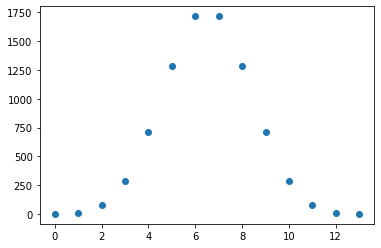

In [5]:
#@title Hands-on plotting of each row
import matplotlib.pyplot as plt

n = 13
support = [i for i in range(n+1)]
plt.scatter(support, PascalTriangle[n])
plt.show()

Footnote: the author believes that many mathematical concepts are essentially inventions of some intelligent beings under certain circumstances. Successful concepts may fit in more general circumstances, some may appear in various cultures by transmission/reinvention, and some may even have universal significance. Reinvention is unavoidable when there is friction in transmission of concepts. Now, in our journey of discovery, we meant to be a *wayfarer* following the paths of our pioneers, bypassing the process of reinventing the wheel. In this journey, we share their joys of getting something done. In the future, we will follow our own journey and some of us may even make some new inventions to push the frontiers of knowledge.

##3.3 Application of Combinations

**3.3.1** 
Dedicated to the math team of the alma mater.

Example: We have $6$ spare batteries to be distributed to $3$ stations. Including those plans that some station may receive $0$ spare battery, how many differnt plans are there in total?



In [ ]:
#make sure you run previous code cells before running this one
def sparesAllocationPrint(n,r):
  count = 0
  for item in nCrTriangle[n][r]:
    count += 1
    selectedToken = ''.join("|" if item[i]=='1' else 'b' for i in range(len(item)))
    print(str(count)+".\t"+selectedToken, end = '\n')
  print("The above is a list of {}C{} = {} batteries allocation plans, we use {} |'s to partition {} stations:".format(n,r, len(nCrTriangle[n][r]), r, r+1), end = '\n')
  return

#you may try with some different number, some small positive integers
batteries = 6
station = 3
expansion(batteries+station-1)
sparesAllocationPrint(batteries+station-1,station-1)

1.	||bbbbbb
2.	|b|bbbbb
3.	|bb|bbbb
4.	|bbb|bbb
5.	|bbbb|bb
6.	|bbbbb|b
7.	|bbbbbb|
8.	b||bbbbb
9.	b|b|bbbb
10.	b|bb|bbb
11.	b|bbb|bb
12.	b|bbbb|b
13.	b|bbbbb|
14.	bb||bbbb
15.	bb|b|bbb
16.	bb|bb|bb
17.	bb|bbb|b
18.	bb|bbbb|
19.	bbb||bbb
20.	bbb|b|bb
21.	bbb|bb|b
22.	bbb|bbb|
23.	bbbb||bb
24.	bbbb|b|b
25.	bbbb|bb|
26.	bbbbb||b
27.	bbbbb|b|
28.	bbbbbb||
The above is a list of 8C2 = 28 batteries allocation plans, we use 2 |'s to partition 3 stations:


**3.3.2** checkpoint

1.   Could we generalize to count allocation for an arbitary number of spare batteries to an arbitary number of stations?
2.   Re-do this exercise by adding a requirement that each station should receive at least $1$ spare battery. You may introduce some additional condition if necessary.



##3.4 Binomial Theorem

**3.4.1** Recall that Colab is a powerful computing tool. Let's use it to expand the following polynomial:

$$(x+A)(x+B)(x+C)(x+D)(x+E)(x+F)$$

Let's expand the polynomial and group similar terms by running the next code cell:

In [ ]:
#@title Codes are boring here. Let's hide them and just inspect the result.
#@markdown If you have trouble running the cell here, please go back and check if the code cell under 3.1.3 is running probably.

components = ['A','B','C','D','E','F']
def expansionPrint(components):
  print("First, we expand with distributive law (and also assoicative law actually);")
  print("Then, we group similar terms with commutative law and distributive law.", end="\n\n\n")

  n = len(components)
  expansion(n)
  expandedCode = nCrTriangle[n]
  print("  ", end = "")
  for i in range(n):
    if i == n-1:
      print("(x+{}) \n\n=".format(components[i]), end = '')  
    else:
      print("(x+{})".format(components[i]), end = '')
  for i in range(n+1):
    for j in range(len(expandedCode[i])):
        if i != 0 and j == 0:
          print(" ", end = '')
        item = expandedCode[i][j]
        term = ''.join(components[k] if item[k]=='1' else 'x' for k in range(len(item)))
        if i < n:
          print(" " + term, end =" +")
        else:
          print(" " + term, end ="\n\n=")
    if i != n:
      print("")

  for i in range(n+1):
    if i == 0:
      print(" x^{} +".format(n))
    elif i == n:
      print("  "+"".join(components))
    else:
      print("  (", end = "")
      for j in range(len(expandedCode[i])):
        item = expandedCode[i][j]
        term = ''.join(components[k] if item[k]=='1' else '' for k in range(len(item)))
        if i < n:
          if j < len(expandedCode[i])-1:
            print(term, end =" + ")
          else:
            print(term, end ="")
        else:
          print(term, end ="")
      if n-i > 1:
        print(") x^{} +".format(n-i))
      else:
        print(") x +")
  print('')
  return
expansionPrint(components)

First, we expand with distributive law (and also assoicative law actually);
Then, we group similar terms with commutative law and distributive law.


  (x+A)(x+B)(x+C)(x+D)(x+E)(x+F) 

= xxxxxx +
  Axxxxx + xBxxxx + xxCxxx + xxxDxx + xxxxEx + xxxxxF +
  ABxxxx + AxCxxx + AxxDxx + AxxxEx + AxxxxF + xBCxxx + xBxDxx + xBxxEx + xBxxxF + xxCDxx + xxCxEx + xxCxxF + xxxDEx + xxxDxF + xxxxEF +
  ABCxxx + ABxDxx + ABxxEx + ABxxxF + AxCDxx + AxCxEx + AxCxxF + AxxDEx + AxxDxF + AxxxEF + xBCDxx + xBCxEx + xBCxxF + xBxDEx + xBxDxF + xBxxEF + xxCDEx + xxCDxF + xxCxEF + xxxDEF +
  ABCDxx + ABCxEx + ABCxxF + ABxDEx + ABxDxF + ABxxEF + AxCDEx + AxCDxF + AxCxEF + AxxDEF + xBCDEx + xBCDxF + xBCxEF + xBxDEF + xxCDEF +
  ABCDEx + ABCDxF + ABCxEF + ABxDEF + AxCDEF + xBCDEF +
  ABCDEF

= x^6 +
  (A + B + C + D + E + F) x^5 +
  (AB + AC + AD + AE + AF + BC + BD + BE + BF + CD + CE + CF + DE + DF + EF) x^4 +
  (ABC + ABD + ABE + ABF + ACD + ACE + ACF + ADE + ADF + AEF + BCD + BCE + BCF + BDE + BDF + BEF + CDE 

**3.4.2** The Binomial Theorem

From the above experience, it is convincing that in general when expanding the product of $n$ linear terms of $x$, there are $C^n_{n-i}$ items (or equivalently $C^n_{i}$) to be summed up for the coefficient of $x^i$. 

In particular, when $A=B=C=\cdots$ , we have the binomial theorem:

$$(x+A)^n = C^n_{0} x^n + C^n_{1} A x^{n-1} + \cdots + C^n_{n-1} A^{n-1} x + C^n_{n}A^{n}$$

or equivalently,

$$(x+A)^n = C^n_{n} x^n + C^n_{n-1} A x^{n-1} + \cdots + C^n_{1} A^{n-1} x + C^n_{0}A^{n}$$

Sometimes, it's useful to study the identity given by the substitution $A=1$:


$$(x+1)^n = C^n_n x^n + C^n_{n-1} x^{n-1}+ \cdots + C^n_{1} x + C^n_{0}$$

or equivalently,

$$(x+1)^n = C^n_0 x^n + C^n_{1} x^{n-1}+ \cdots + C^n_{n-1} x + C^n_{n}$$


**3.4.3** One more property of combinations that shouldn't be missed.

By subsituting $x=1$ in the last identity, we have one more property of combinations that you may already know:

$$2^n = C^n_{0} + C^n_{1} + \cdots + C^n_{n-1} + C^n_{n}$$

This is also clear from the viewpoint of combinatorics:

by counting in two ways, possible outcomes of making $n$ binary choices. 

**3.4.4** *Hidden Hands-on Section*

In [ ]:
#@title Audience interested in trinomial expansion may play with the following starter codes...
pascalPyramid = [[[['']]],[[['x']],[['y'],['z']]]]

def trinomialExpansion(n):
  global pascalPyramid
  if len(pascalPyramid) > n:
    return pascalPyramid[n]
  triangle = trinomialExpansion(n-1)
  newTriangle = [[[] for j in range(i+1)] for i in range(n+1)]
  for line in triangle:
    for point in line:
      for item in point:
        xExpand = item + 'x'
        yExpand = item + 'y'
        zExpand = item + 'z'
        yMass = item.count('y')
        zMass = item.count('z')
        newTriangle[yMass+zMass][zMass].append(xExpand)
        newTriangle[yMass+zMass+1][zMass].append(yExpand)
        newTriangle[yMass+zMass+1][zMass+1].append(zExpand)
  pascalPyramid.append(newTriangle)
  return pascalPyramid[n]

while True:
  n = int(input('Please give me a small (non-negative) integer:'))
  if n<2:
    print("but larger than this one")
  elif n>10:
    print("a smaller one please")
  else:
    break

print("\n When we expand (x+y+z)^{} by the distributive law, the following are the terms to be dealt with:".format(n))

trinomialExpansion(n)
print(pascalPyramid[n])

trinomialCoefficients = [[[len(item) for item in line] for line in triangle] for triangle in pascalPyramid]
print("\n Note that the counting of like terms would lead to the construction of trinomial coefficients:")
print(trinomialCoefficients[n])

Please give me a small (non-negative) integer:2

 When we expand (x+y+z)^2 by the distributive law, the following are the terms to be dealt with:
[[['xx']], [['xy', 'yx'], ['xz', 'zx']], [['yy'], ['yz', 'zy'], ['zz']]]

 Note that the counting of like terms would lead to the construction of trinomial coefficients:
[[1], [2, 2], [1, 2, 1]]


In [ ]:
#@title From binomial coefficients to trinomial coefficients; from the Pascal triangle to the Pascal pyramid.

n = 3 #@param{type:"slider", min:0, max:30, step:1}

#an experiment on yield statement

def triangle():
  global n
  layer = [1]
  yield layer
  while len(layer) <= n:
    first = layer + [0]
    second = [0] + layer
    layer = [sum(binomial) for binomial in zip(first, second)]
    yield layer


def pyramid():
  global n
  layer = [[1]]
  yield layer
  while len(layer) <= n:
    size = len(layer)+1
    first = layer + [[0 for i in range(size)]]
    second = [[0]] + [[0] + line for line in layer]
    third = [[0]] + [line + [0] for line in layer]
    layer = [[sum(trinomial) for trinomial in zip(first[i], second[i], third[i])] for i in range(size)]
    yield layer

for layer in triangle():
  print(layer)
print("The above is the Pascal triangle of order {}.\n\n".format(n))


for layer in pyramid():
  print(layer)
  #comment the previous line and uncomment the next line to see inverted triangle
  #print(layer[::-1])
print("The above is the Pascal pyramid of order {}.".format(n))

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
The above is the Pascal triangle of order 3.


[[1]]
[[1], [1, 1]]
[[1], [2, 2], [1, 2, 1]]
[[1], [3, 3], [3, 6, 3], [1, 3, 3, 1]]
The above is the Pascal pyramid of order 3.


**3.4.5** Possible projects

1.  Audience interested in mathematics may check out [multinomial coefficients](https://mathworld.wolfram.com/MultinomialCoefficient.html) and investigate their relations.

2.  Audience interested in computer science may try to use [yield statement](https://betterprogramming.pub/yield-in-python-76413d5e2a27) to boost performance of some previous codes in this series of demonstration.

3.  Audience interested in both may try to write codes for multinomial coefficients and construct Pascal simplices of higher dimension.


# Next episode: some bell shaped distributions

What are bell shaped distributions?

Understanding distributions takes some serious efforts. A bell shape is easier to see.

Umm... look back in the output under 3.4.1, rotate the first expansion by $90^\circ$ (anti-clockwise). That's what a bell shape roughly looks like.